# UN Data Analysis #

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Formatting

In [2]:
%matplotlib inline

### Get Started

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [6]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [7]:
gdp_df.shape

(6729, 4)

In [8]:
internet_df.shape

(4495, 4)

In [9]:
gdp_df.dtypes; 

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [22]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [23]:
internet_df = internet_df.drop(columns=["Value Footnotes"])

In [24]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})

In [25]:
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})

In [26]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [27]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [28]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df)

In [29]:
gdp_and_internet_use_subset = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

In [30]:
gdp_and_internet_use_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.993216,60.100000
18,Albania,2009,9525.377979,41.200000


In [31]:
gdp_net_2004 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2004]

In [32]:
gdp_net_2009 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2009]

In [33]:
gdp_net_2014 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2014]

In [34]:
gdp_net_2014['Internet_Users_Pct'].max()

98.16

In [35]:
gdp_net_2014['Internet_Users_Pct'].min()

1.14

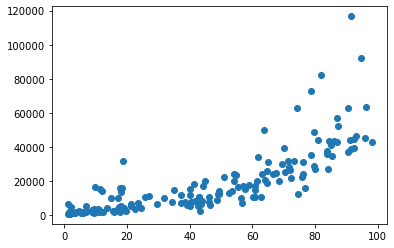

In [36]:
plt.scatter(gdp_net_2014["Internet_Users_Pct"], gdp_net_2014["GDP_Per_Capita"])